Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.6783 - loss: 0.8428 - val_accuracy: 0.8597 - val_loss: 0.3731
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8590 - loss: 0.3875 - val_accuracy: 0.8882 - val_loss: 0.3077
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8785 - loss: 0.3296 - val_accuracy: 0.8938 - val_loss: 0.2913
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8922 - loss: 0.2945 - val_accuracy: 0.8901 - val_loss: 0.2938
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8981 - loss: 0.2775 - val_accuracy: 0.8980 - val_loss: 0.2770
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9011 - loss: 0.2709


[0.264277845621109, 0.90420001745224]

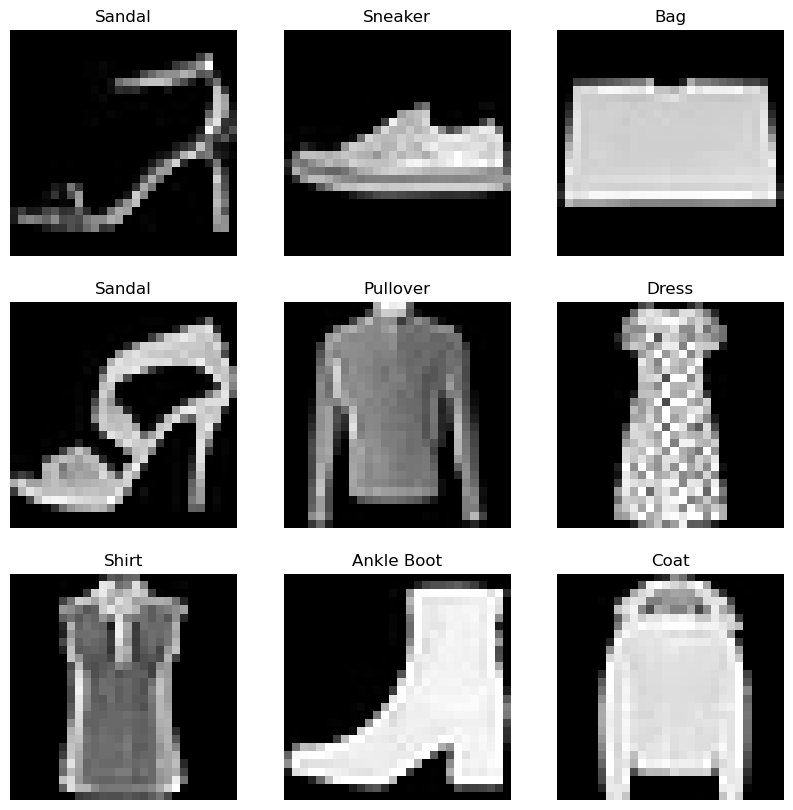

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Paths to your dataset CSV files
train_csv_path = "fashion-mnist_train.csv"  # Replace with actual path
test_csv_path = "fashion-mnist_test.csv"    # Replace with actual path

# Load the data
train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)

# Separate features and labels
x_train = train_data.iloc[:, 1:].values  # All columns except the first one are features
y_train = train_data.iloc[:, 0].values   # First column is the label

x_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

# Reshape and normalize the data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# Split data for validation
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Display a few images from the dataset with labels
class_labels = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
    plt.title(class_labels[y_train[i]])
    plt.axis("off")

# Define the CNN model with Input layer
cnn = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, kernel_size=3, strides=(2, 2), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])

# Compile the model
cnn.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])

# Add EarlyStopping callback to stop training when no improvement is seen
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with a smaller number of epochs initially
cnn.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1, validation_data=(x_validation, y_validation), callbacks=[early_stopping])

# Evaluate the model on the test set
cnn.evaluate(x_test, y_test)